In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filename = "turkiye-student-evaluation_generic.csv"
Y = pd.read_csv(filename)
Y = Y[Y["class"] == 11]
np.savetxt("class.csv", Y, delimiter=',', fmt='%.f')
print(Y)

      instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
1636      2     11          3           2           3   3   2   4   3   2   
1637      2     11          1           0           3   2   2   3   3   3   
1638      2     11          1           4           4   5   5   5   5   5   
1639      2     11          1           3           3   1   3   2   2   3   
1640      2     11          2           3           3   1   1   1   1   1   
...     ...    ...        ...         ...         ...  ..  ..  ..  ..  ..   
2115      2     11          1           1           4   1   1   1   1   1   
2116      2     11          1           4           5   3   3   3   3   3   
2117      2     11          1           3           5   5   1   1   5   5   
2118      2     11          2           2           3   3   3   3   3   3   
2119      2     11          1           1           4   4   4   4   4   4   

      ...  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  
1636  ...    

In [4]:
Y1 = Y[Y["attendance"] == 0]
Y1 = Y1[Y1["nb.repeat"] > 1]
print(Y1)

      instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
1651      2     11          2           0           4   1   1   4   1   1   
1652      2     11          2           0           3   4   4   4   4   4   
1675      2     11          2           0           1   3   3   3   3   3   
1739      2     11          2           0           4   3   3   3   3   3   
1745      2     11          2           0           3   4   4   4   4   4   
1779      2     11          3           0           4   4   4   4   4   4   
1835      2     11          3           0           4   4   4   4   4   4   
1855      2     11          2           0           5   1   1   1   1   1   
1862      2     11          2           0           4   1   1   1   1   1   
1912      2     11          2           0           3   1   1   1   1   1   
1924      2     11          2           0           3   3   3   3   3   3   
1948      2     11          2           0           2   4   4   4   4   4   

In [5]:
Y2 = Y[(Y["attendance"] > 3)]
print(Y2)
np.savetxt("class2.csv", Y2, delimiter=',', fmt='%.f')

      instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
1638      2     11          1           4           4   5   5   5   5   5   
1644      2     11          1           4           4   1   4   5   4   5   
1648      2     11          1           4           4   1   2   3   3   4   
1656      2     11          1           4           2   3   3   3   3   3   
1676      2     11          1           4           3   5   5   5   5   5   
...     ...    ...        ...         ...         ...  ..  ..  ..  ..  ..   
2105      2     11          1           4           4   4   4   4   4   4   
2107      2     11          1           4           4   4   4   4   4   4   
2111      2     11          1           4           4   2   3   4   3   5   
2112      2     11          1           4           3   3   3   3   3   3   
2116      2     11          1           4           5   3   3   3   3   3   

      ...  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  
1638  ...    

In [6]:
Y3 = Y[Y["attendance"] > 0]
Y3 = Y3[(Y3["attendance"] < 3) & (Y3["difficulty"] < 4)]
Y4 = np.vstack((Y1, Y2, Y3))
Y4 = Y4[:, 2::]
str_len = len(Y4[1, :])
stl_len = len(Y4[:, 1])
print(Y4)
np.savetxt("class3.csv", Y4, delimiter=',', fmt='%.f')

[[2 0 4 ... 4 4 4]
 [2 0 3 ... 4 4 4]
 [2 0 1 ... 3 3 3]
 ...
 [2 1 3 ... 5 5 5]
 [1 2 3 ... 3 3 3]
 [2 2 3 ... 3 3 3]]


In [7]:
# for i in range(stl_len):
#     disp[i] = np.var(Y4[i, 3::])
# part25 = int(0.25*stl_len)
# index_of_min = 0
# list_of_students = np.arange(0, part25, 1)
# for j in range(part25):
#     minim = 10
#     for ii in range(stl_len):
#         if disp[ii] < minim:
#             minim = disp[ii]
#             index_of_min = ii
#     disp[index_of_min] = 10000
#     list_of_students[j] = index_of_min
# #print(list_of_students)
# list_of_students.sort()
#
# Y5 = []
# for s in range(stl_len):
#     k = 0
#     for f in range(part25):
#         if s == list_of_students[f]:
#             k += 1
#             continue
#     if k == 0:
#         Y5 += [Y4[s, :]]

In [8]:
Y5 = []
for i in range(stl_len):
    if np.var(Y4[i, 3:]) != 0:
        Y5 += [Y4[i, :]]

In [9]:
Y5 = np.array(Y5)
#print(Y5)
np.savetxt("class4.csv", Y5, delimiter=',', fmt='%.f')

In [10]:
stl_len2 = len(Y5[:, 1])
disp = np.arange(0, stl_len2, 1)
for i in range(stl_len2):
    disp[i] = np.var(Y5[i, 3::])
part25 = int(0.25*stl_len2)
index_of_min = 0
list_of_students = np.arange(0, part25, 1)
for j in range(part25):
    minim = 10
    for ii in range(stl_len2):
        if disp[ii] < minim:
            minim = disp[ii]
            index_of_min = ii
    disp[index_of_min] = 10000
    list_of_students[j] = index_of_min
#print(list_of_students)
list_of_students.sort()

In [11]:
Y6 = []
for s in range(stl_len2):
    k = 0
    for f in range(part25):
        if s == list_of_students[f]:
            k += 1
            continue
    if k == 0:
        Y6 += [Y5[s, :]]
Y6 = np.array(Y6)
np.savetxt("class5.csv", Y6, delimiter=',', fmt='%.f')
print(Y6, "\n")
mean_all = np.mean(Y6[:, 3::])
print("Среднее значение среди всех вопросов: ", mean_all)
stdev_all = np.std(Y6[:, 3::], ddof=1)
print("Стандартное отклонение среди всех вопросов: ", stdev_all)
max_all = np.max(Y6[:, 3::])
print("Max среди всех вопросов: ", max_all)
min_all = np.min(Y6[:, 3::])
print("Min среди всех вопросов: ", min_all)
median_all = np.median(Y6[:, 3::])
print("Медиана среди всех вопросов: ", median_all, "\n\n")

[[2 0 4 ... 4 4 4]
 [2 0 3 ... 1 1 1]
 [1 4 4 ... 4 5 5]
 ...
 [1 1 2 ... 2 2 2]
 [1 1 3 ... 5 5 5]
 [2 1 3 ... 5 5 5]] 

Среднее значение среди всех вопросов:  3.336038961038961
Стандартное отклонение среди всех вопросов:  1.279195022409496
Max среди всех вопросов:  5
Min среди всех вопросов:  1
Медиана среди всех вопросов:  4.0 




In [12]:
mean_of_class = np.mean(Y6[:, 3:15])
print("Среднее значение среди вопросов о предмете: ", mean_of_class)
mean_of_instructor = np.mean(Y6[:, 15::])
print("Среднее значение среди вопросов о преподавателе: ", mean_of_instructor, "\n")

stdev_class = np.std(Y6[:, 3:15], ddof=1)
print("Стандартное отклонение среди вопросов о предмете: ", stdev_class)
stdev_instructor = np.std(Y6[:, 15::], ddof=1)
print("Стандартное отклонение среди вопросов о преподавателе: ", stdev_instructor, "\n")

max_class = np.max(Y6[:, 3:15])
print("Max среди вопросов о предмете: ", max_class)
max_instructor = np.max(Y6[:, 15::])
print("Max среди вопросов о предмете: ", max_instructor)

min_class = np.min(Y6[:, 3:15])
print("Min среди вопросов о предмете: ", min_class)
min_instructor = np.min(Y6[:, 15::])
print("Min среди вопросов о преподавателе: ", min_instructor)

median_class = np.median(Y6[:, 3:15])
print("Медиана среди вопросов о предмете:", median_class)
median_instructor = np.median(Y6[:, 15::])
print("Медиана среди вопросов о преподавателе:", mean_of_instructor, "\n")

Среднее значение среди вопросов о предмете:  3.042929292929293
Среднее значение среди вопросов о преподавателе:  3.555871212121212 

Стандартное отклонение среди вопросов о предмете:  1.3066688831587858
Стандартное отклонение среди вопросов о преподавателе:  1.2131599092405263 

Max среди вопросов о предмете:  5
Max среди вопросов о предмете:  5
Min среди вопросов о предмете:  1
Min среди вопросов о преподавателе:  1
Медиана среди вопросов о предмете: 3.0
Медиана среди вопросов о преподавателе: 3.555871212121212 



In [13]:
mean_of_org_qstn = np.mean(Y6[:, 3:11])
print("Среднее значение среди вопросов из 1 подвида:", mean_of_org_qstn)
mean_of_em_qstn = np.mean(Y6[:, 11:15])
print("Среднее значение среди вопросов из 2 подвида:", mean_of_em_qstn, "\n")
mean_of_personal_instr = np.mean(Y6[:, 15:22])
print("Среднее значение среди вопросов из 3 подвида:", mean_of_personal_instr, "\n")
mean_of_communic_instr = np.mean(Y6[:, 22::])
print("Среднее значение среди вопросов из 4 подвида:", mean_of_communic_instr, "\n")

stdev_org_qstn = np.std(Y6[:, 3:11], ddof=1)
print("Стандартное отклонение среди вопросов из 1 подвида:", stdev_org_qstn)
stdev_em_qstn = np.std(Y6[:, 11:15], ddof=1)
print("Стандартное отклонение среди вопросов из 2 подвида:", stdev_em_qstn, "\n")
stdev_personal_instr = np.std(Y6[:, 15:22], ddof=1)
print("Стандартное отклонение среди вопросов из 3 подвида:", stdev_personal_instr, "\n")
stdev_communic_instr = np.std(Y6[:, 22::], ddof=1)
print("Стандартное отклонение среди вопросов из 4 подвида:", stdev_communic_instr, "\n")

median_org_qstn = np.median(Y6[:, 3:11])
print("Медиана среди вопросов из 1 подвида:", median_org_qstn)
median_em_qstn = np.median(Y6[:, 11:15])
print("Медиана среди вопросов из 2 подвида:", mean_of_em_qstn, "\n")
median_personal_instr = np.median(Y6[:, 15:22])
print("Медиана среди вопросов из 3 подвида:", mean_of_personal_instr, "\n")
median_communic_instr = np.median(Y6[:, 22::])
print("Медиана среди вопросов из 4 подвида:", mean_of_communic_instr, "\n")

Среднее значение среди вопросов из 1 подвида: 2.945075757575758
Среднее значение среди вопросов из 2 подвида: 3.2386363636363638 

Среднее значение среди вопросов из 3 подвида: 3.517316017316017 

Среднее значение среди вопросов из 4 подвида: 3.585858585858586 

Стандартное отклонение среди вопросов из 1 подвида: 1.2947179196271286
Стандартное отклонение среди вопросов из 2 подвида: 1.3109163037657066 

Стандартное отклонение среди вопросов из 3 подвида: 1.2246221887269964 

Стандартное отклонение среди вопросов из 4 подвида: 1.2043493496582627 

Медиана среди вопросов из 1 подвида: 3.0
Медиана среди вопросов из 2 подвида: 3.2386363636363638 

Медиана среди вопросов из 3 подвида: 3.517316017316017 

Медиана среди вопросов из 4 подвида: 3.585858585858586 



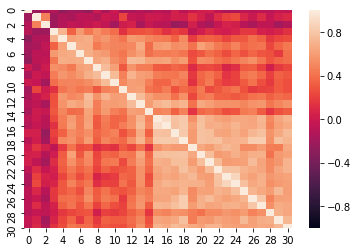

In [14]:
# res = np.histogram(X[:,13])
# print(res)
# plt.hist(X[:,13],bins=5)
# plt.show()

#sns.countplot(x='Customer service calls', hue='Churn', data=Y6[:, 3::]);
C = np.corrcoef(np.transpose(Y6)) #матрица корреляций
plt.show(sns.heatmap(C, vmin=-1, vmax=1))
np.savetxt("correlation.csv", C, delimiter=',', fmt='%.3f')
# print(C)

Матрица сложности предмета:
 [4 3 4 4 4 3 5 4 3 4 4 5 3 1 3 3 4 2 5 4 4 5 3 3 3 3 2 3 3 2 3 2 2 3 3 2 3
 3 3 3 3 2 3 2 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 2 3 3]
Средняя сложность предмета:  3.0606060606060606
Стандартное отклонение предмета:  0.8015137194235931
Max сложность предмета:  5
Min сложность предмета:  1


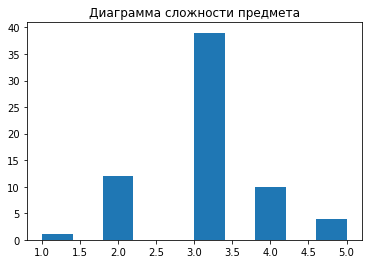

In [16]:
np.savetxt("class5.csv", Y6, delimiter=',', fmt='%.f')

Z = pd.read_csv("class5.csv", names=["nb.repeat", "attendance", "difficulty", "Q1", "Q2", "Q3", "Q4", "Q5",
              "Q6", "Q7", "Q8", "Q9", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q16", "Q17", "Q18",
              "Q19", "Q20", "Q21", "Q22", "Q23", "Q24", "Q25", "Q26", "Q27", "Q28"])

slozh = np.array(Z['difficulty'])
print("Матрица сложности предмета:\n", slozh)
print("Средняя сложность предмета: ", slozh.mean())
print("Стандартное отклонение предмета: ", np.std(slozh, ddof=1))
print("Max сложность предмета: ", slozh.max())
print("Min сложность предмета: ", slozh.min())
plt.hist(slozh)
plt.title("Диаграмма сложности предмета")
plt.show()

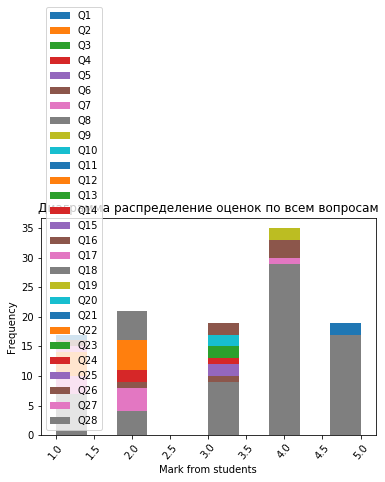

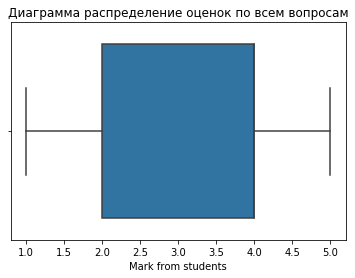

In [17]:
Z = Z.drop('nb.repeat', 1)
Z = Z.drop('attendance', 1)
Z = Z.drop('difficulty', 1)
#
Z.plot(kind='hist', rot=50).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по всем вопросам")
plt.show()
sns.boxplot(Z).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по всем вопросам")
plt.show()

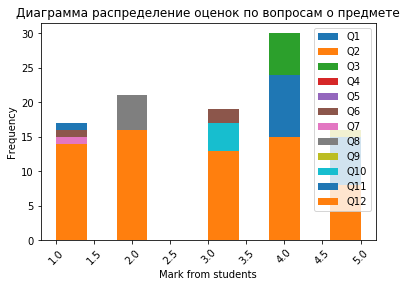

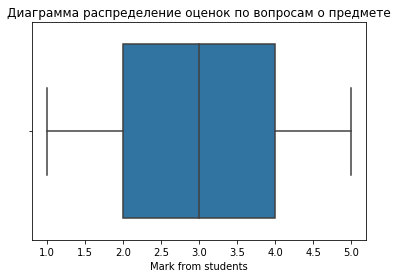

In [18]:
Z1 = Z.drop('Q13', 1)
Z1 = Z1.drop('Q14', 1)
Z1 = Z1.drop('Q15', 1)
Z1 = Z1.drop('Q16', 1)
Z1 = Z1.drop('Q17', 1)
Z1 = Z1.drop('Q18', 1)
Z1 = Z1.drop('Q19', 1)
Z1 = Z1.drop('Q20', 1)
Z1 = Z1.drop('Q21', 1)
Z1 = Z1.drop('Q22', 1)
Z1 = Z1.drop('Q23', 1)
Z1 = Z1.drop('Q24', 1)
Z1 = Z1.drop('Q25', 1)
Z1 = Z1.drop('Q26', 1)
Z1 = Z1.drop('Q27', 1)
Z1 = Z1.drop('Q28', 1)
Z1.plot(kind='hist', rot=45).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам о предмете")
plt.show()
sns.boxplot(Z1).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам о предмете")
plt.show()

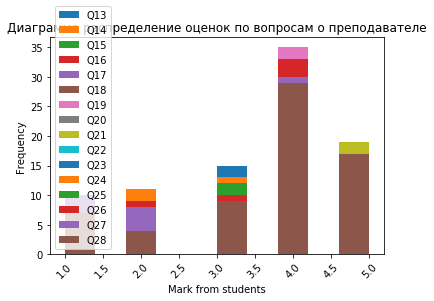

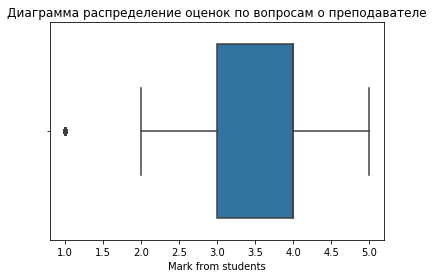

In [19]:
Z2 = Z.drop('Q1', 1)
Z2 = Z2.drop('Q2', 1)
Z2 = Z2.drop('Q3', 1)
Z2 = Z2.drop('Q4', 1)
Z2 = Z2.drop('Q5', 1)
Z2 = Z2.drop('Q6', 1)
Z2 = Z2.drop('Q7', 1)
Z2 = Z2.drop('Q8', 1)
Z2 = Z2.drop('Q9', 1)
Z2 = Z2.drop('Q10', 1)
Z2 = Z2.drop('Q11', 1)
Z2 = Z2.drop('Q12', 1)
Z2.plot(kind='hist', rot=45).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам о преподавателе")
plt.show()
sns.boxplot(Z2).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам о преподавателе")
plt.show()

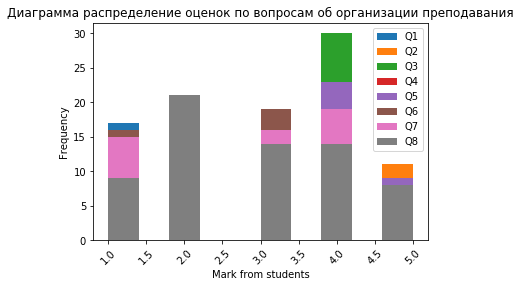

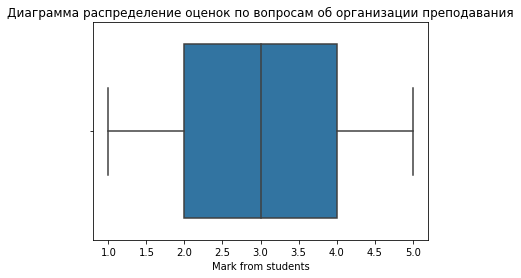

In [20]:
Z3 = Z.drop('Q9', 1)
Z3 = Z3.drop('Q10', 1)
Z3 = Z3.drop('Q11', 1)
Z3 = Z3.drop('Q12', 1)
Z3 = Z3.drop('Q13', 1)
Z3 = Z3.drop('Q14', 1)
Z3 = Z3.drop('Q15', 1)
Z3 = Z3.drop('Q16', 1)
Z3 = Z3.drop('Q17', 1)
Z3 = Z3.drop('Q18', 1)
Z3 = Z3.drop('Q19', 1)
Z3 = Z3.drop('Q20', 1)
Z3 = Z3.drop('Q21', 1)
Z3 = Z3.drop('Q22', 1)
Z3 = Z3.drop('Q23', 1)
Z3 = Z3.drop('Q24', 1)
Z3 = Z3.drop('Q25', 1)
Z3 = Z3.drop('Q26', 1)
Z3 = Z3.drop('Q27', 1)
Z3 = Z3.drop('Q28', 1)
Z3.plot(kind='hist', rot=45).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам об организации преподавания")
plt.show()
sns.boxplot(Z3).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам об организации преподавания")
plt.show()

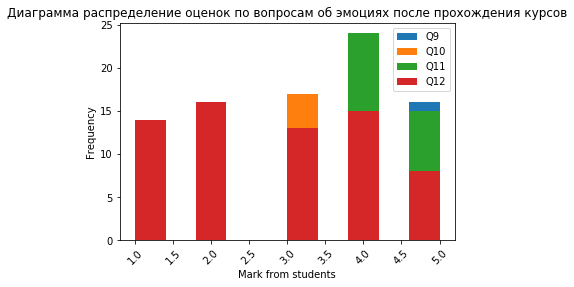

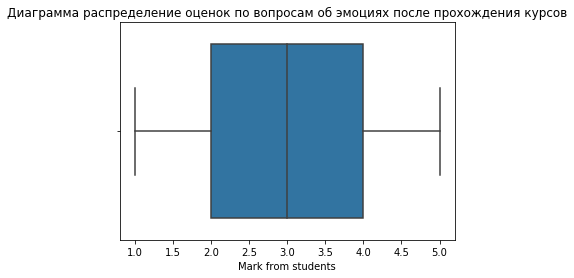

In [21]:
Z4 = Z.drop('Q1', 1)
Z4 = Z4.drop('Q2', 1)
Z4 = Z4.drop('Q3', 1)
Z4 = Z4.drop('Q4', 1)
Z4 = Z4.drop('Q5', 1)
Z4 = Z4.drop('Q6', 1)
Z4 = Z4.drop('Q7', 1)
Z4 = Z4.drop('Q8', 1)
Z4 = Z4.drop('Q13', 1)
Z4 = Z4.drop('Q14', 1)
Z4 = Z4.drop('Q15', 1)
Z4 = Z4.drop('Q16', 1)
Z4 = Z4.drop('Q17', 1)
Z4 = Z4.drop('Q18', 1)
Z4 = Z4.drop('Q19', 1)
Z4 = Z4.drop('Q20', 1)
Z4 = Z4.drop('Q21', 1)
Z4 = Z4.drop('Q22', 1)
Z4 = Z4.drop('Q23', 1)
Z4 = Z4.drop('Q24', 1)
Z4 = Z4.drop('Q25', 1)
Z4 = Z4.drop('Q26', 1)
Z4 = Z4.drop('Q27', 1)
Z4 = Z4.drop('Q28', 1)
Z4.plot(kind='hist', rot=45).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам об эмоциях после прохождения курсов")
plt.show()
sns.boxplot(Z4).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам об эмоциях после прохождения курсов")
plt.show()

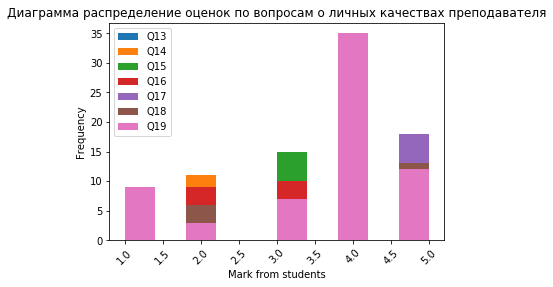

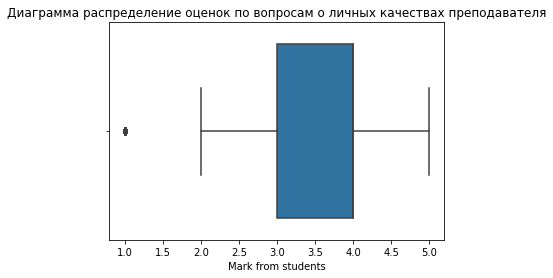

In [22]:
Z5 = Z.drop('Q1', 1)
Z5 = Z5.drop('Q2', 1)
Z5 = Z5.drop('Q3', 1)
Z5 = Z5.drop('Q4', 1)
Z5 = Z5.drop('Q5', 1)
Z5 = Z5.drop('Q6', 1)
Z5 = Z5.drop('Q7', 1)
Z5 = Z5.drop('Q8', 1)
Z5 = Z5.drop('Q9', 1)
Z5 = Z5.drop('Q10', 1)
Z5 = Z5.drop('Q11', 1)
Z5 = Z5.drop('Q12', 1)
Z5 = Z5.drop('Q20', 1)
Z5 = Z5.drop('Q21', 1)
Z5 = Z5.drop('Q22', 1)
Z5 = Z5.drop('Q23', 1)
Z5 = Z5.drop('Q24', 1)
Z5 = Z5.drop('Q25', 1)
Z5 = Z5.drop('Q26', 1)
Z5 = Z5.drop('Q27', 1)
Z5 = Z5.drop('Q28', 1)
Z5.plot(kind='hist', rot=45).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам о личных качествах преподавателя")
plt.show()
sns.boxplot(Z5).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам о личных качествах преподавателя")
plt.show()

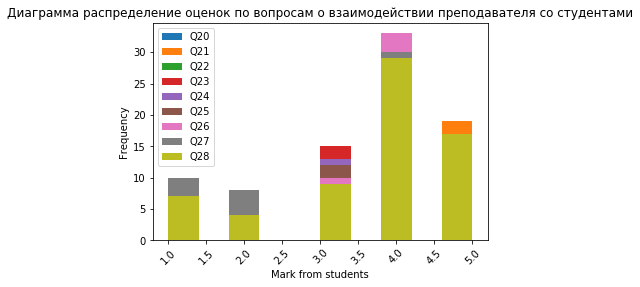

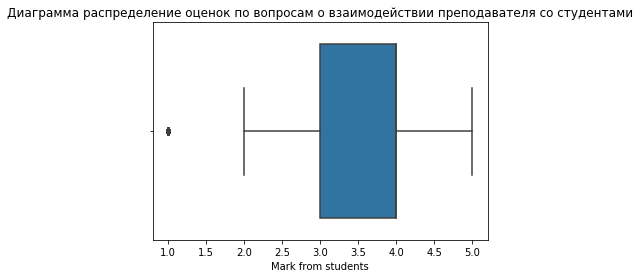

In [23]:
Z6 = Z.drop('Q1', 1)
Z6 = Z6.drop('Q2', 1)
Z6 = Z6.drop('Q3', 1)
Z6 = Z6.drop('Q4', 1)
Z6 = Z6.drop('Q5', 1)
Z6 = Z6.drop('Q6', 1)
Z6 = Z6.drop('Q7', 1)
Z6 = Z6.drop('Q8', 1)
Z6 = Z6.drop('Q9', 1)
Z6 = Z6.drop('Q10', 1)
Z6 = Z6.drop('Q11', 1)
Z6 = Z6.drop('Q12', 1)
Z6 = Z6.drop('Q13', 1)
Z6 = Z6.drop('Q14', 1)
Z6 = Z6.drop('Q15', 1)
Z6 = Z6.drop('Q16', 1)
Z6 = Z6.drop('Q17', 1)
Z6 = Z6.drop('Q18', 1)
Z6 = Z6.drop('Q19', 1)

Z6.plot(kind='hist', rot=45).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам о взаимодействии преподавателя со студентами")
plt.show()
sns.boxplot(Z6).set(xlabel='Mark from students')
plt.title("Диаграмма распределение оценок по вопросам о взаимодействии преподавателя со студентами")
plt.show()